### Step 1: Download the csv file
### Step 2: Upload the csv file in Colab
### Step 3: Load the dataset

In [1]:
# Import the pandas module
import pandas as pd

# Set the uploaded dataset in a variable
# Use read_csv function to read the uploaded csv file and display it in a tabular format
data = pd.read_csv("/content/adult_dataset.csv")

data.head() # This will show first few records of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [2]:
# Check the dataset info
# This will help us to identify,
#  1. Total number of columns in the dataset
#  2. Number records in the dataset
#  3. Data types of each column
#  4. Any missing values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


# Data Preprocessing

In [3]:
# Check for duplicate entries in the dataset
data.duplicated().sum()

# This shows there are duplicate entries in the dataset

np.int64(16)

In [4]:
# Remove duplicate entries from the dataset
data.drop_duplicates(inplace=True)

In [5]:
# Check again for duplicate entries
data.duplicated().sum()

# Now there are no duplicate entries in the dataset

np.int64(0)

In [6]:
# Next check for missing or null values in the dataset
data.isnull().sum()

# There are missing values in the dataset

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [7]:
# Calculate the percentage of null values
round(data.isnull().mean()*100,2)

# Here no column percentage is more than or equal to 40 %
# So no column needs to be dropped
# Only needs to fill the missing values in the dataset

,0
age,5.00
workclass,6.89
fnlwgt,0.00
education,0.00
education-num,0.00
marital-status,0.00
occupation,6.88
relationship,0.00
race,0.00
sex,0.00


In [8]:
# Replace '?' with NaN
import numpy as np

data.replace('?', np.nan, inplace=True)

In [9]:
# Remove Extra Spaces in Strings
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()

In [10]:
# Separate Numerical and Categorical Columns
numerical_cols = data.select_dtypes(include="number").columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)

Numerical: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [11]:
# Fill Missing Values
# Mode for categorical
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Median for numerical
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-260620794.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-260620794.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [12]:
# Checking again for missing or null values in the dataset
data.isnull().sum()

# Now the missing values are handled in the dataset

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [13]:
# Drop Income Column
data.drop('income', axis=1, inplace=True)

In [14]:
# Display the data after dropping the income column
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States
48838,64.0,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40.0,United-States
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States


In [15]:
# Display the statistical summary of the the dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48826.000000,4.882600e+04,48826.000000,48826.000000,48826.000000,48826.000000
mean,38.597428,1.896605e+05,10.078278,1079.421230,87.530988,40.428481
std,13.602653,1.056025e+05,2.570759,7453.214369,403.067466,12.326046
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376170e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


Skewness of age is 1.0178261301576765


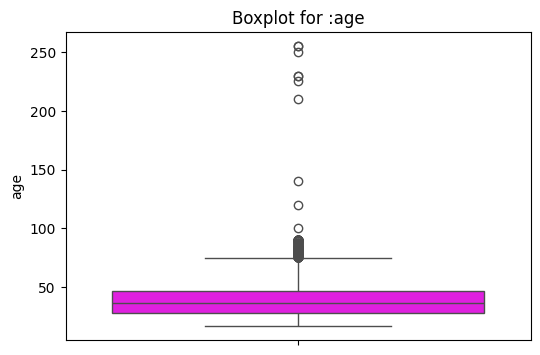

Skewness of fnlwgt is 1.439357421923382


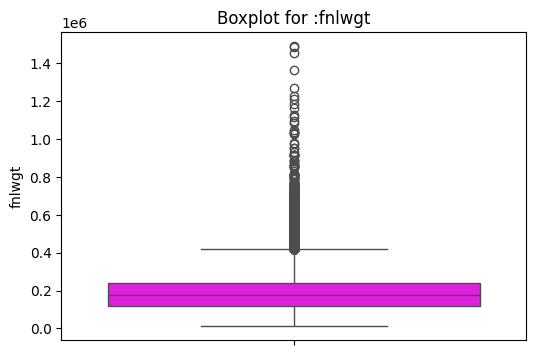

Skewness of education-num is -0.3159699164222054


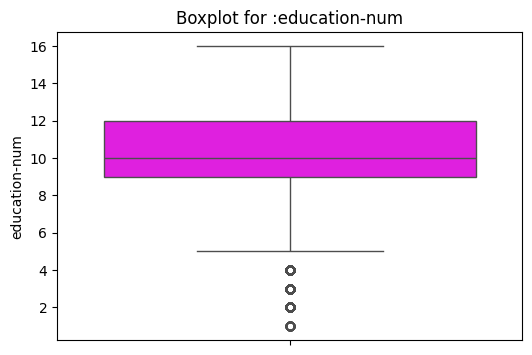

Skewness of capital-gain is 11.892691923804659


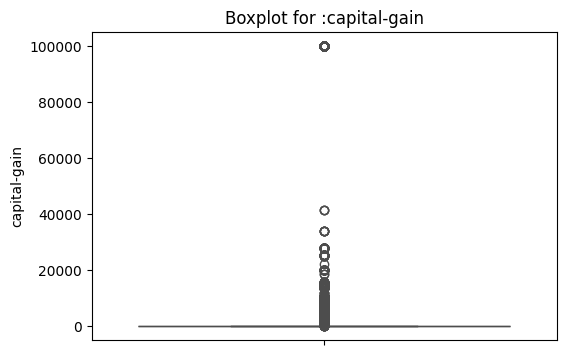

Skewness of capital-loss is 4.568956145690445


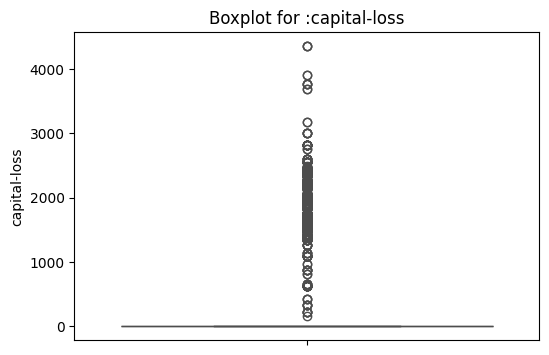

Skewness of hours-per-week is 0.8129373452995078


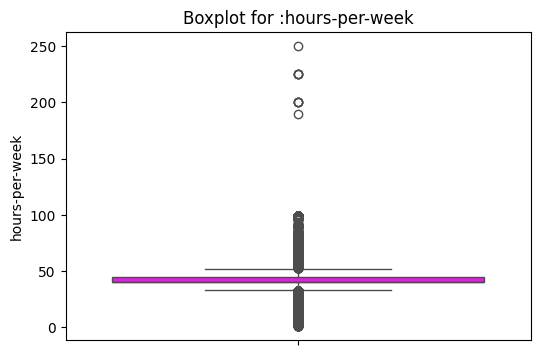

In [16]:
# Draw Boxplot to find the outliers in numerical columns of dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=data[numerical_cols][i],color='magenta')
  plt.title('Boxplot for :'+ i)
  print('\033[1m' + f"Skewness of {i} is {data[numerical_cols][i].skew()}"+ '\033[0m')
  plt.show()

In [17]:
# Function to handle the outliers in the numerical columns of the dataset
def handle_outliers_numeric(data, numeric_cols):
  for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    # use .loc to modify safely
    # In the below code,
    # : - means all rows
    # col - only this column
    data.loc[:, col] = data[col].clip(LL,UL)

  return data

In [18]:
# Call the function - handle_outliers_numeric(data, numeric_cols)
# This will cap the outliers in the created dataset - bnew_data
handle_outliers_numeric(data, numerical_cols)

/tmp/ipython-input-1574472348.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[13. 13.  9. ... 13. 13. 13.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, col] = data[col].clip(LL,UL)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States
48838,64.0,Private,321403,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40.0,United-States
48839,38.0,Private,374983,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States
48840,44.0,Private,83891,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40.0,United-States


Skewness of age is 0.5300995463815201


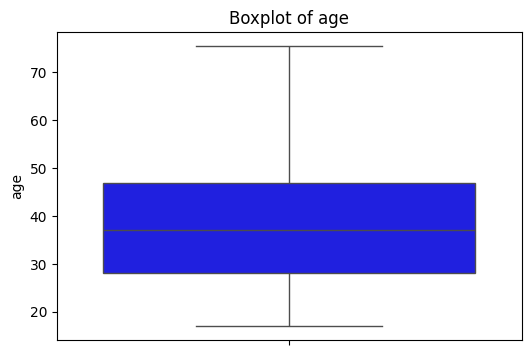

Skewness of fnlwgt is 0.5550219622111296


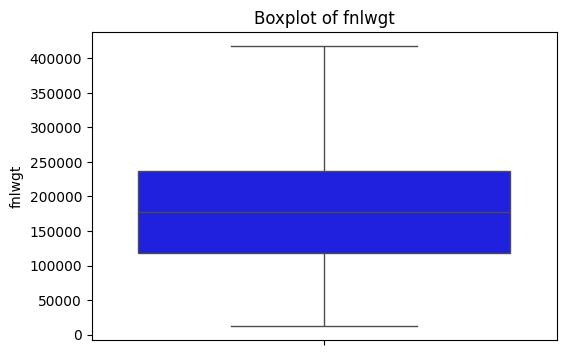

Skewness of education-num is -0.03534972804843271


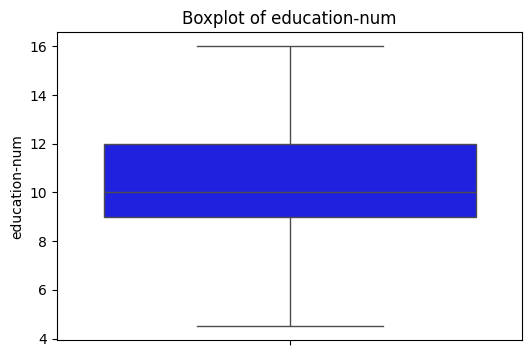

Skewness of capital-gain is 0.0


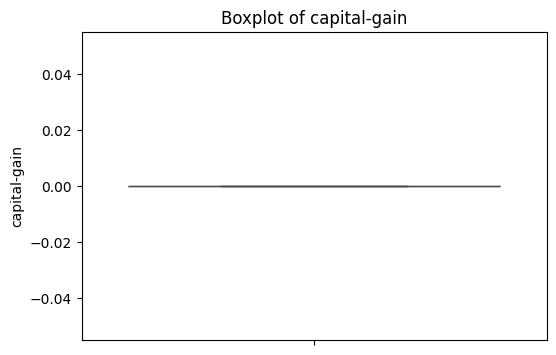

Skewness of capital-loss is 0.0


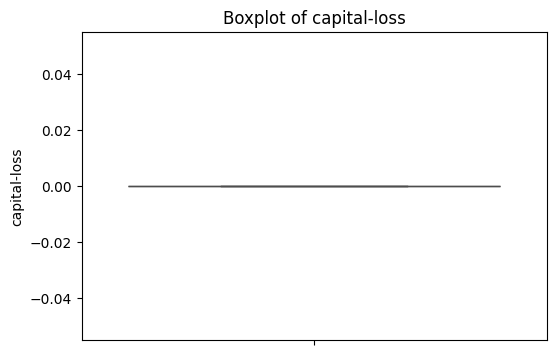

Skewness of hours-per-week is 0.48041518017196627


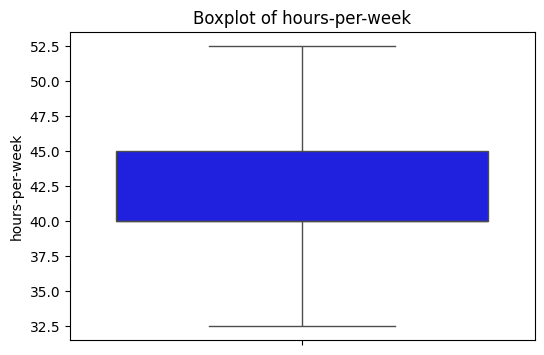

In [19]:
# Check again the Boxplot for outliers after the outlier cap in the numerical columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=data[numerical_cols][i],color='blue')
  plt.title('Boxplot of '+ i)
  print('\033[1m' + f"Skewness of {i} is {data[numerical_cols][i].skew()}"+ '\033[0m')
  plt.show()

# Now there are no outliers in the numerical columns after the outlier cap

In [20]:
# Encode Categorical columns (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

In [21]:
# Display the dataset after Categorical encoding
data_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721,7.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409,13.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13.0,0,0,36.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,64.0,321403,9.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,38.0,374983,13.0,0,0,50.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,44.0,83891,13.0,0,0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
# Apply scaling to the features of the dataset
# Only the features require scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_encoded.columns)

# Display the dataset after scaling
scaled_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.035123,-1.146152,1.171344,0.0,0.0,-0.187370,-0.254632,-0.013578,-1.802003,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
1,0.864064,-1.085355,1.171344,0.0,0.0,-1.430414,-0.254632,-0.013578,-1.802003,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
2,-0.040236,0.303009,-0.456772,0.0,0.0,-0.187370,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
3,1.090139,0.503130,-1.270830,0.0,0.0,-0.187370,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
4,-0.793819,1.590950,1.171344,0.0,0.0,-0.187370,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,-3.367365,-0.041265,-0.021709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48821,0.035123,0.300627,1.171344,0.0,0.0,-0.850327,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
48822,1.919081,1.412535,-0.456772,0.0,0.0,-0.187370,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
48823,-0.040236,1.974658,1.171344,0.0,0.0,1.470021,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
48824,0.411914,-1.079270,1.171344,0.0,0.0,-0.187370,-0.254632,-0.013578,0.554938,-0.185487,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709


# Preprocessing Justification

1. Replaced '?' with missing values for proper handling
2. Filled categorical missing values with mode
3. Filled numerical missing values with median
4. Removed income column
5. Used IQR method to cap outliers
6. Applied one-hot encoding to convert categorical features into numeric format
7. Scaled features using StandardScaler

# Exploratory Data Analysis (EDA)

In [23]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

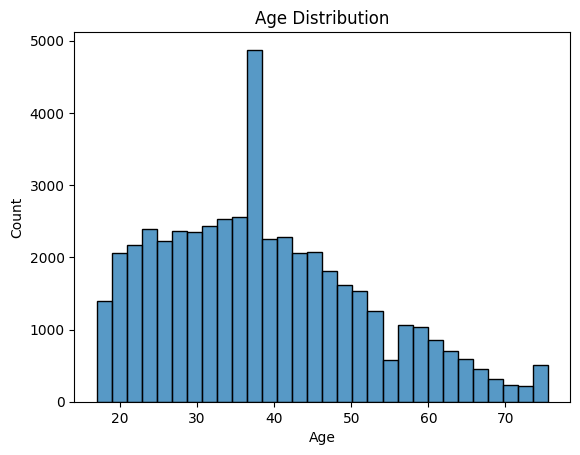

In [24]:
# Visualize distribution of:
# Age Distribution
sns.histplot(data['age'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

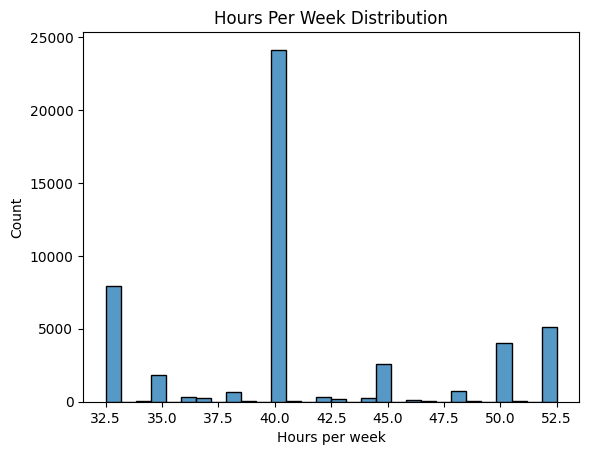

In [25]:
# Hours per Week Distribution
sns.histplot(data['hours-per-week'], bins=30)
plt.title("Hours Per Week Distribution")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()

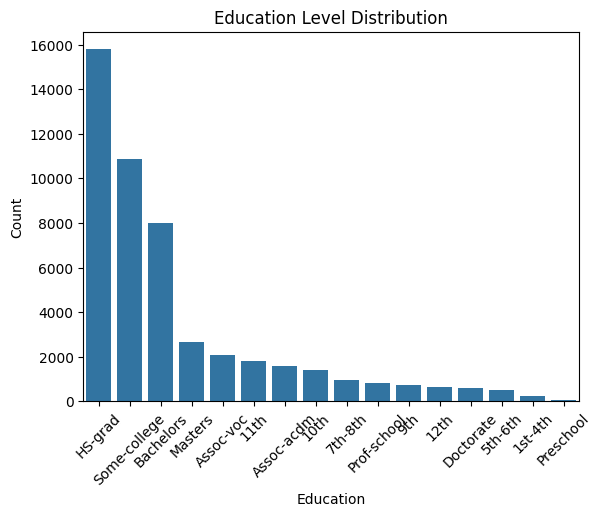

In [26]:
# Education Level Distribution
sns.countplot(x='education', data=data, order=data['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Level Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [27]:
# Skewness of Capital Gain and Loss
print("Capital Gain Skewness:", data['capital-gain'].skew())
print("Capital Loss Skewness:", data['capital-loss'].skew())

Capital Gain Skewness: 0.0
Capital Loss Skewness: 0.0


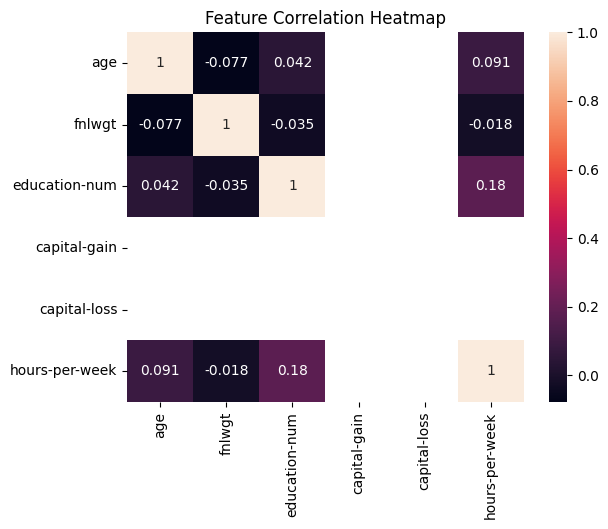

In [28]:
# Correlation Heatmap (Numerical Features)
sns.heatmap(data[numerical_cols].corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Clustering

##K-Means

In [29]:
# Import KMeans & Evaluation Metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
# Elbow Method (Find Optimal K)
inertia = []

K_range = range(2, 11)   # testing clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

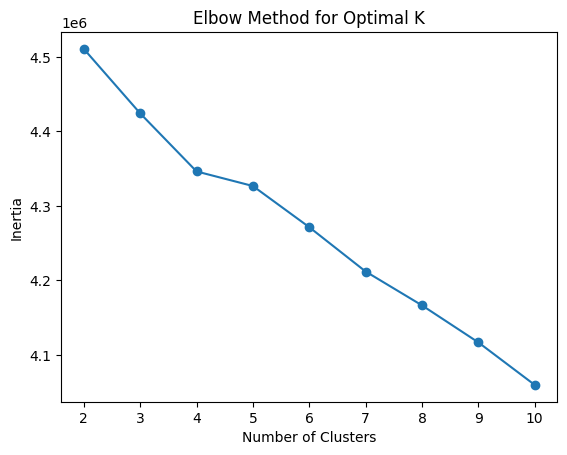

In [31]:
# Plot Elbow curve
import matplotlib.pyplot as plt

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

1. From the Elbow point choose best K
2. K = 4 seems to be the best value for K

In [36]:
# Silhouette Score (Confirm Best K)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print("K =", k, "Silhouette Score =", round(score, 4))

K = 2 Silhouette Score = 0.0513
K = 3 Silhouette Score = 0.0456
K = 4 Silhouette Score = 0.0348
K = 5 Silhouette Score = 0.0495
K = 6 Silhouette Score = 0.016
K = 7 Silhouette Score = 0.0333
K = 8 Silhouette Score = 0.0387
K = 9 Silhouette Score = 0.0234
K = 10 Silhouette Score = 0.0559


In [32]:
# Train Final K-Means Model
# Replace optimal_k with the chosen value.
# Let K = 4
optimal_k = 4

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(scaled_df)

In [33]:
# Add Cluster Labels to Data
clustered_df = scaled_df.copy()
clustered_df['KMeans_Cluster'] = kmeans_labels

print(clustered_df.head())

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.035123 -1.146152       1.171344           0.0           0.0   
1  0.864064 -1.085355       1.171344           0.0           0.0   
2 -0.040236  0.303009      -0.456772           0.0           0.0   
3  1.090139  0.503130      -1.270830           0.0           0.0   
4 -0.793819  1.590950       1.171344           0.0           0.0   

   hours-per-week  workclass_Local-gov  workclass_Never-worked  \
0       -0.187370            -0.254632               -0.013578   
1       -1.430414            -0.254632               -0.013578   
2       -0.187370            -0.254632               -0.013578   
3       -0.187370            -0.254632               -0.013578   
4       -0.187370            -0.254632               -0.013578   

   workclass_Private  workclass_Self-emp-inc  ...  native-country_Puerto-Rico  \
0          -1.802003               -0.185487  ...                   -0.059975   
1          -1.802003            

In [34]:
# Cluster Size Check
print(clustered_df['KMeans_Cluster'].value_counts())

KMeans_Cluster
0    20727
3    14740
2    12731
1      628
Name: count, dtype: int64


##Agglomerative Clustering

In [35]:
# Import Required Libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

1. Due to the large dataset size, this is consuming more memory space and the Colab workspace is crashing
2. Considering this taking a small sample for Dendogram
3. For the below code sets a sample size of 2000 is used for better performance

In [36]:
sample_size = 2000

scaled_sample = scaled_df.sample(n=sample_size, random_state=42)

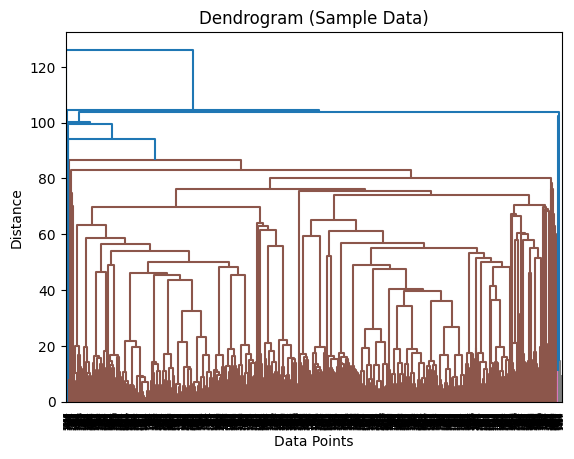

In [35]:
# Create Dendrogram
linked = linkage(scaled_sample, method='ward')

dendrogram(linked)
plt.title("Dendrogram (Sample Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [37]:
# Train Agglomerative Model
# Reduce dataset size because it is consuming more memory space and crashing
sample_df = scaled_df.sample(n=2000, random_state=42)

# Run Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglo_labels = agglo_model.fit_predict(sample_df)

In [40]:
# Add Cluster Labels
sample_df = scaled_df.sample(n=2000, random_state=42)
sample_clustered_df = clustered_df.loc[sample_df.index].copy()

sample_clustered_df['Agglomerative_Cluster'] = agglo_labels

print(sample_clustered_df.head())

            age    fnlwgt  education-num  capital-gain  capital-loss  \
26233  0.261198 -1.538158       0.357286           0.0           0.0   
14222 -0.115594 -0.752005      -0.456772           0.0           0.0   
1122  -0.341669 -1.432962      -0.049743           0.0           0.0   
12790 -0.417028  0.520703       1.171344           0.0           0.0   
12290  0.562631 -0.668179      -0.456772           0.0           0.0   

       hours-per-week  workclass_Local-gov  workclass_Never-worked  \
26233       -1.430414            -0.254632               -0.013578   
14222        1.470021            -0.254632               -0.013578   
1122        -0.518849            -0.254632               -0.013578   
12790       -0.187370            -0.254632               -0.013578   
12290        1.884368            -0.254632               -0.013578   

       workclass_Private  workclass_Self-emp-inc  ...  \
26233           0.554938               -0.185487  ...   
14222           0.554938        

In [42]:
# Cluster Distribution
print(sample_clustered_df['Agglomerative_Cluster'].value_counts())

Agglomerative_Cluster
1    1979
0      16
3       4
2       1
Name: count, dtype: int64


In [43]:
# Compare with K-Means
comparison = pd.crosstab(
    sample_clustered_df['KMeans_Cluster'],
    sample_clustered_df['Agglomerative_Cluster']
)

print(comparison)

Agglomerative_Cluster   0    1  2  3
KMeans_Cluster                      
0                      11  877  0  2
1                       0   15  0  0
2                       3  517  1  0
3                       2  570  0  2


# Dimensionality Reduction using PCA (After Clustering)
##PCA for Cluster Visualization & Interpretation

In [45]:
# Import PCA
from sklearn.decomposition import PCA

In [46]:
# Apply PCA (2 Components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

In [48]:
# Add Cluster Labels to PCA Data
pca_df = pca_df.loc[sample_clustered_df.index].copy()

pca_df['KMeans_Cluster'] = sample_clustered_df['KMeans_Cluster'].values
pca_df['Agglomerative_Cluster'] = sample_clustered_df['Agglomerative_Cluster'].values

print(pca_df.head())

            PC1       PC2  KMeans_Cluster  Agglomerative_Cluster
26233  0.393525 -0.326555               0                      1
14222  1.050209 -1.157271               0                      1
1122   1.971951  0.614736               0                      1
12790  1.467602  0.657194               0                      1
12290  2.938733 -1.075109               0                      1


In [49]:
# Explained Variance Ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:",
      pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.03573053 0.0278521 ]
Total variance captured: 0.06358263063472287


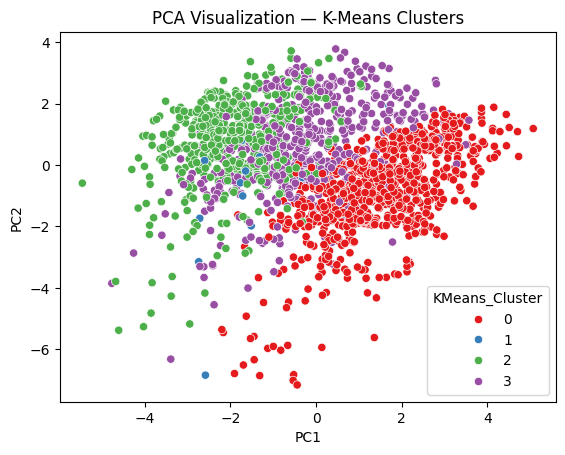

In [50]:
# PCA Plot (K-Means Clusters)
# PCA Visulalization — K-Means
sns.scatterplot(x='PC1', y='PC2',
                hue='KMeans_Cluster',
                data=pca_df,
                palette='Set1')

plt.title("PCA Visualization — K-Means Clusters")
plt.show()

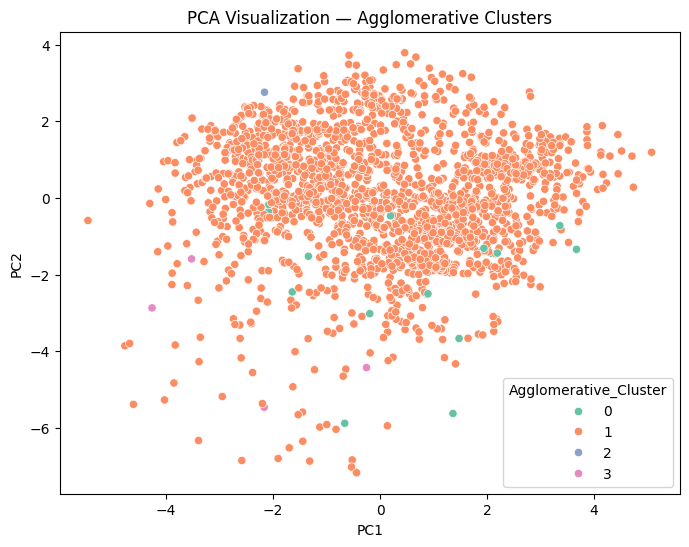

In [51]:
# PCA Plot (Agglomerative Clusters)
# PCA Visulalization — Agglomerative
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2',
                hue='Agglomerative_Cluster',
                data=pca_df,
                palette='Set2')

plt.title("PCA Visualization — Agglomerative Clusters")
plt.show()

# Interpretation
1. Cluster separation is visible in PCA space
2. Both K-Means and Agglomerative clustering show similar grouping patterns